# Dirichlet Conditions and Fourier Transforms

The Dirichlet conditions are a set of sufficient conditions for a function to be representable by a Fourier series at a point. These conditions are important for understanding when and how a function can be transformed into the frequency domain.

## Dirichlet Conditions:

### 1. Absolute Integrability
The function must be absolutely integrable over one period, meaning:
$$\int_{-T/2}^{T/2} |f(t)| dt < \infty$$

**Example:** A sine wave is absolutely integrable over any period, while a function that approaches infinity (like $1/t$ near $t=0$) may not be.

### 2. Finite Number of Discontinuities
The function can only have a finite number of points where it jumps from one value to another.

**Example:** A square wave has exactly two discontinuities per period (rising and falling edges), satisfying this condition. In contrast, functions like $\sin(1/t)$ near $t=0$ have infinitely many discontinuities in any interval containing zero.

### 3. Finite Number of Extrema
The function must have a finite number of maxima and minima within one period.

**Example:** A triangle wave has exactly one maximum and one minimum per period. Functions with infinite oscillations like $t\sin(1/t)$ near $t=0$ violate this condition.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, fftfreq

# Define the rectangular function
def rect(t, width=1):
    return np.where(np.abs(t) < width/2, 1, np.where(np.abs(t) == width/2, 0.5, 0))

def rect_removed(t, width=1):
    return np.where(np.abs(t) < width/2, 1, np.where(np.abs(t) == width/2, np.nan, 0))

# Time axis (Reduced number of points to enhance visibility of differences)
t = np.linspace(-1, 1, 100,endpoint=False)

# Compute rectangular functions
rect_original = rect(t, width=1)
rect_modified = rect_removed(t, width=1)

# Compute Fourier Transforms
N = len(t)
freqs = fftshift(fftfreq(N, d=t[1] - t[0]))  # Frequency axis
FT_original = fftshift(fft(rect_original))
FT_modified = fftshift(fft(np.nan_to_num(rect_modified)))  # Remove NaNs for FFT

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original function
axs[0, 0].plot(t, rect_original, 'b', linewidth=2)
axs[0, 0].set_title("Original Rectangular Function")
axs[0, 0].set_xlabel("Time (t)")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].grid()
freq_bounds=20
# Modified function
axs[0, 1].plot(t, rect_modified, 'r', linewidth=2)
axs[0, 1].set_title("Modified Rectangular Function (t=±1/2 Removed)")
axs[0, 1].set_xlabel("Time (t)")
axs[0, 1].set_ylabel("Amplitude")
axs[0, 1].grid()

# Fourier Transform of Original Function
axs[1, 0].plot(freqs, np.abs(FT_original), 'b', linewidth=2)
axs[1, 0].set_xlim(-50, 50)  # Zoom in on frequency range
axs[1, 0].set_title("Fourier Transform of Original Function")
axs[1, 0].set_xlabel("Frequency (ω)")
axs[1, 0].set_ylabel("Magnitude")
axs[1, 0].set_xlim(-freq_bounds, freq_bounds)  # Apply frequency bounds

axs[1, 0].grid()

# Fourier Transform of Modified Function
axs[1, 1].plot(freqs, np.abs(FT_modified), 'r', linewidth=2)
axs[1, 1].set_xlim(-50, 50)  # Zoom in on frequency range
axs[1, 1].set_title("Fourier Transform of Modified Function")
axs[1, 1].set_xlabel("Frequency (ω)")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-freq_bounds, freq_bounds)  # Apply frequency bounds

axs[1, 1].grid()

plt.tight_layout()
plt.show()


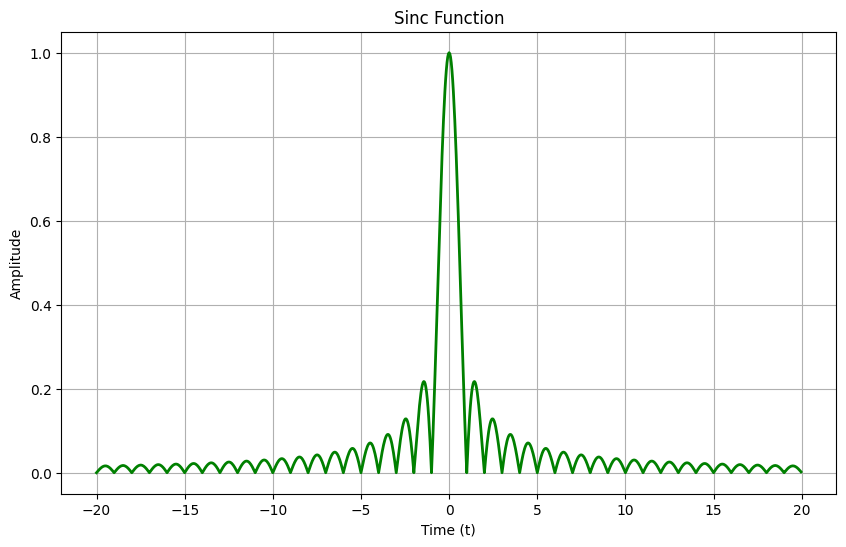

: 

In [ ]:
t = np.linspace(-20, 20, 1000,endpoint=False)
# Calculate the sinc function
# Note: numpy's sinc function is defined as sinc(x) = sin(πx)/(πx)
sinc_values = abs(np.sinc(t))

# Plot the sinc function
plt.figure(figsize=(10, 6))
plt.plot(t, sinc_values, 'g', linewidth=2)
plt.title("Sinc Function")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [11]:
len(t)/2

50.0